In [ ]:
import pandas as pd
import re
from wordcloud import STOPWORDS
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

In [1]:
# load data - download from https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

df = pd.read_csv('IMDB-Dataset.csv')

print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [3]:
# merge and purge process

text = ' '.join(df['review'].astype(str).tolist())

text = re.sub(r'[^A-Za-z\s]', '', text)

text = text.lower()

stopwords = set(STOPWORDS)

custom_stopwords = ["br", "see", "seem", "well", "way", "look", "even", "much"]

all_stopwords = STOPWORDS.union(set(custom_stopwords)) # Combine default and custom stopwords
    
text = ' '.join(word for word in text.split() if word not in all_stopwords)

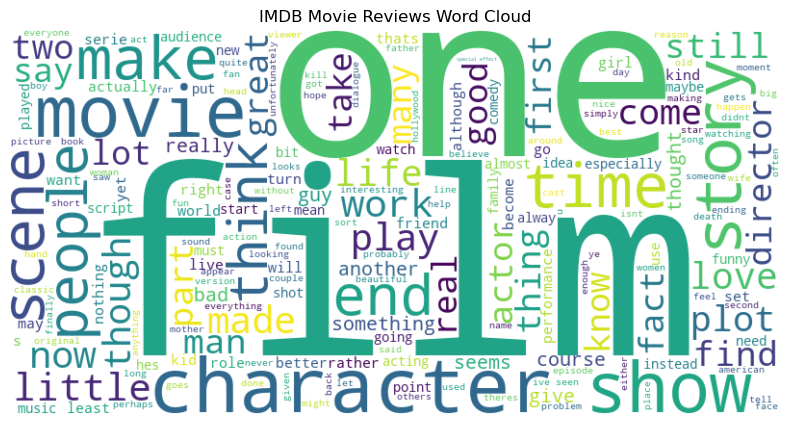

In [5]:
# wordcloud in python

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title("IMDB Movie Reviews Word Cloud")
plt.show()

In [9]:
# process text to create wordcloud in Tableau

def word_frequency(text):
    text = text.lower()
    words = re.findall(r'\b\w+\b', text)
    word_counts = Counter(words)
    return word_counts

In [11]:
frequencies = word_frequency(text)

all_words = []

for word, count in frequencies.items():
    #print(f"{word}: {count}")
    all_words.append(f"{word}: {count}")

In [15]:
df = pd.DataFrame(all_words)

In [17]:
df[['Word', 'Frequency']] = df[0].str.split(':', expand=True)
final = df[['Word','Frequency']]
final['Frequency'] = final['Frequency'].astype(float)
final = final.sort_values(by='Frequency', ascending=False)
top_100 = final[:100]

In [71]:
top_100.head(20)

,Word,Frequency
285,movie,83523.0
297,film,74459.0
0,one,51028.0
384,good,28570.0
209,time,23269.0
179,really,22951.0
408,story,22097.0
587,will,17997.0
175,great,17821.0
520,bad,17719.0


In [73]:
top_100.to_csv('wordcloud_top_100.csv')